#  Basic Image Manipulations with OpenCV


 [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MlDwlTMb8aeqSofqynr1aC7JlxFZq0Hh?usp=sharing)

Welcome to the second module in the OpenCV series. In this notebook, we explore how to directly manipulate images using OpenCV. These basic techniques form the building blocks for any computer vision project — from data augmentation in deep learning to real-time filters in apps like Instagram and Snapchat.

---

##  What You'll Learn

We will cover the following core operations:

- **Accessing and manipulating individual image pixels**
- **Resizing images** (maintaining aspect ratio and custom scaling)
- **Cropping images** (Region of Interest extraction)
- **Flipping images** (mirror and upside-down transformations)

These operations help in:
- Preparing datasets for training models
- Enhancing data through augmentation
- Customizing images for visualization

---

##  Navigation

[![Getting Started – Previous Badge](https://img.shields.io/badge/Getting%20Started-OpenCV-blue)](https://github.com/Adityeah18/opencv/tree/main/01)  

---

Let’s dive into hands-on manipulations with OpenCV!



## 1. Importing Required Libraries

Before we start working on image manipulations, we need to import the essential Python libraries.

- `cv2`: OpenCV, the main library for image processing.
- `matplotlib.pyplot`: Used to display images inline in notebooks.
- `%matplotlib inline`: Jupyter magic command to render plots within the notebook.
- `numpy`: To perform numerical operations, especially for manipulating pixel arrays.
- `PIL.Image`: For additional image operations (we won't use it much here).
- `IPython.display.Image`: For displaying image outputs in Colab/Notebook environments.


In [1]:
# OpenCV library for image processing
import cv2

# Matplotlib for plotting and displaying images
import matplotlib.pyplot as plt

# Ensures that matplotlib images are displayed inline in the notebook
%matplotlib inline

# NumPy for array operations on images (images are treated as arrays)
import numpy as np

# Pillow library: additional image support (not heavily used in this notebook)
from PIL import Image

# For displaying image files directly in the notebook (e.g., in Colab)
from IPython.display import Image


## 2. Reading and Displaying an Image (Grayscale)

We start by loading an image using OpenCV. Here, we load it in **grayscale mode**, which means the image will be converted to a 2D array (only intensity values, no color).

- `cv2.imread()` reads the image file.
- The second argument `0` tells OpenCV to load it in grayscale.
- `plt.imshow()` from `matplotlib` is used to display the image in the notebook.


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

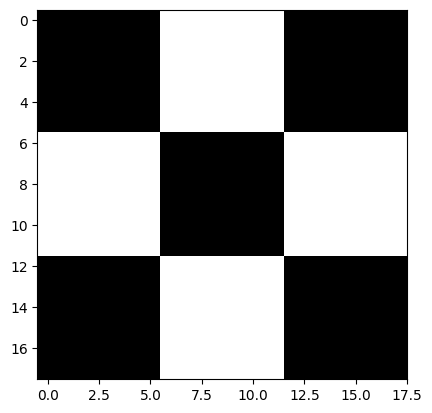

In [3]:
# Read the image in grayscale mode (0 flag tells OpenCV to convert it to single-channel)
cb_img = cv2.imread('checkerboard_18x18.png', 0) #Image is available in the same directory

# Display the grayscale image using matplotlib
plt.imshow(cb_img, cmap='gray')

# Print the raw pixel values as a NumPy array
print(cb_img)


## 3. Accessing Individual Pixels

Images in OpenCV are stored as NumPy arrays. This means we can access pixels using standard array indexing.

- For grayscale images, each pixel is represented by a single integer (0–255).
- The format is `image[row, column]` — i.e., `[x, y]`.

Here, we’ll access:
- The pixel at the top-left corner (0,0).
- A pixel from the 7th row and 6th column (indexing starts at 0).


In [4]:
# Accessing pixel values directly using NumPy indexing

# Print the pixel value at the top-left corner [row 0, col 0]
print(cb_img[0, 0])  # Output: 0 → black pixel

# Print the pixel value at row 6, column 5
print(cb_img[6, 5])  # Output: 255 → white pixel


0
255


## 4. Modifying Pixel Values

We can directly change pixel values in the image using NumPy indexing. Below, we modify a few pixels to observe the effect.


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 255 250   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 150   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

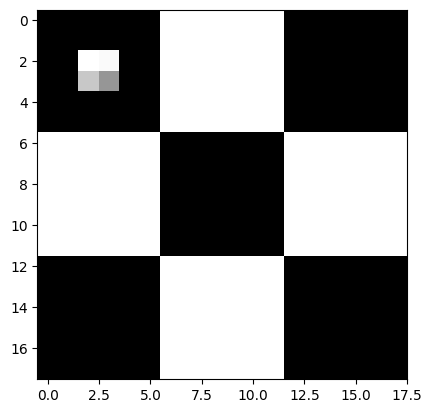

In [5]:
#As now we got the acess in h pixel matrix we can easily can modify those too
cb_image_copy=cb_img.copy() #MAking copy so no effect on original

# Modify specific pixels
cb_image_copy[2,2]=255
cb_image_copy[2,3]=250
cb_image_copy[3,2]=200
cb_image_copy[3,3]=150

# Show the updated image
plt.imshow(cb_image_copy,cmap='gray') #See theres a white section in between the black section of image

print(cb_image_copy) #See ths Matrix change

## 5. Loading Image for Cropping

We read a color image and convert it from BGR (OpenCV default) to RGB (for correct display with matplotlib).



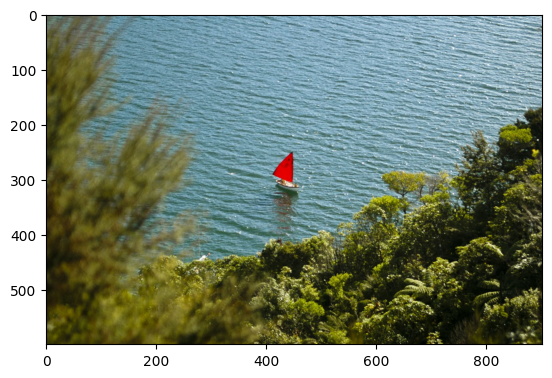

In [6]:
# Read the image in color (default is BGR format)
img_nz_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)

# Convert BGR to RGB for correct visualization
img_nz_rgb = img_nz_bgr[:, :, ::-1]

# Display the image
plt.imshow(img_nz_rgb)


### 5.1 Crop Middle Region

We crop a region from the image using NumPy slicing: `image[y1:y2, x1:x2]`.


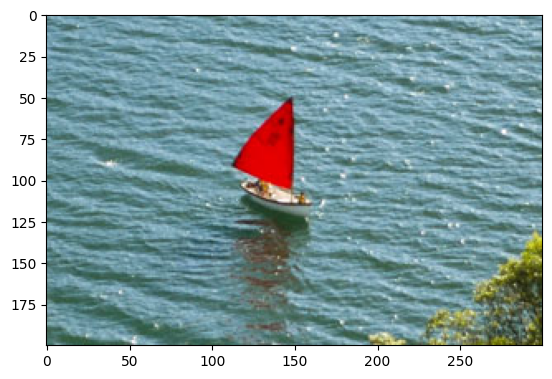

In [7]:
  # Crop a middle region of the image [rows 200 to 400, cols 300 to 600]
cropped_region = img_nz_rgb[200:400, 300:600]

# Display the cropped part
plt.imshow(cropped_region)


## 6. Resizing Images

OpenCV lets you resize images in two ways:

1. By scale factors (`fx`, `fy`)
2. By specifying exact dimensions (`width`, `height`)

When using scale factors, we set `dsize=None`, and OpenCV calculates the new size automatically.


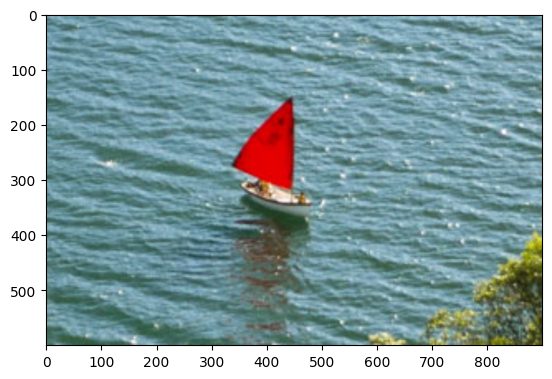

In [8]:
#Method 1
# Resize using scale factors (3x larger)
resize_img = cv2.resize(cropped_region, None, fx=3, fy=3)

# Display the resized image
plt.imshow(resize_img)


We can also resize by setting exact width and height using `dsize=(width, height)`.  
Interpolation is used to calculate pixel values during resizing.

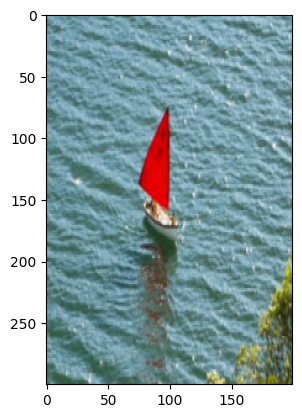

In [10]:
# Set target width and height
width = 200
height = 300
dimension = (width, height)

# Resize using specific dimensions with interpolation
resize_img_w_h = cv2.resize(cropped_region, dsize=dimension, interpolation=cv2.INTER_AREA) #INTER_AREA is best when shrinking,& cv2.INTER_LINEAR for enlarge image

# Display the resized image
plt.imshow(resize_img_w_h)


### 6.2 Resizing While Maintaining Aspect Ratio

To avoid image distortion, we calculate the new height based on the aspect ratio of the original image.


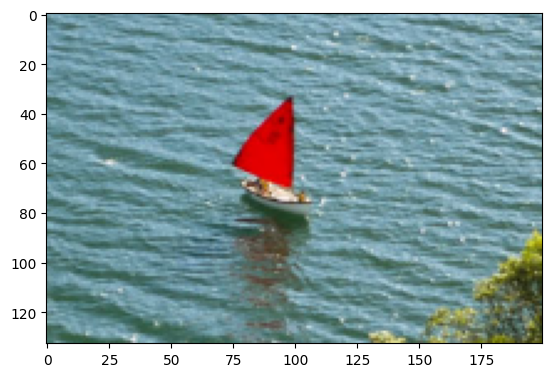

In [11]:
# Set target width
width = 200

# Calculate aspect ratio based on original image width
aspect_ratio = width / cropped_region.shape[1] #cropped_region.shape[1] is a way to say height auto according to any given image; see note below

# Calculate corresponding height to maintain aspect ratio
height = int(cropped_region.shape[0] * aspect_ratio)

# Define new size
dimension = (width, height)

# Resize while preserving aspect ratio
resize_img_aspect_ratio = cv2.resize(cropped_region, dsize=dimension)
plt.imshow(resize_img_aspect_ratio)


📌 **Note on `cropped_region.shape`:**

- `.shape` returns a tuple: **(height, width, channels)** for color images.
- `cropped_region.shape[0]` → height (number of rows)
- `cropped_region.shape[1]` → width (number of columns)

To maintain aspect ratio:

```python
aspect_ratio = new_width / original_width


## 7. Flipping Images

We can flip images using `cv2.flip(image, flipCode)`:

- `0` → Flip vertically (X-axis)
- `1` → Flip horizontally (Y-axis)
- `-1` → Flip both axes


Text(0.5, 1.0, 'Original')

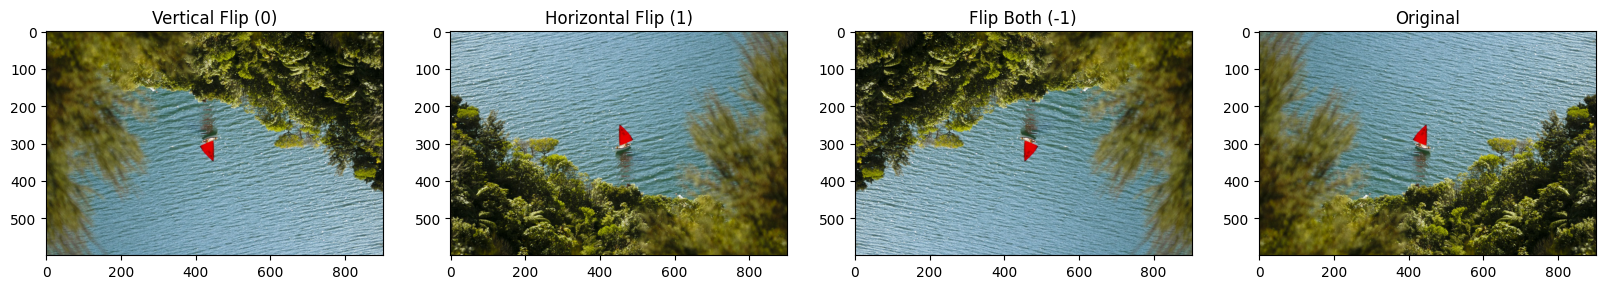

In [13]:
# Flip vertically (along X-axis)
img_nz_flip_vertical = cv2.flip(img_nz_rgb, 0)

# Flip horizontally (along Y-axis)
img_nz_flip_horizontal = cv2.flip(img_nz_rgb, 1)

# Flip both vertically and horizontally
img_nz_flip_both_axis = cv2.flip(img_nz_rgb, -1)

# Display all flips with original image
plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(img_nz_flip_vertical); plt.title("Vertical Flip (0)")
plt.subplot(142); plt.imshow(img_nz_flip_horizontal); plt.title("Horizontal Flip (1)")
plt.subplot(143); plt.imshow(img_nz_flip_both_axis); plt.title("Flip Both (-1)")
plt.subplot(144); plt.imshow(img_nz_rgb); plt.title("Original")


## 8. Saving Images with `cv2.imwrite()`

We use `cv2.imwrite(filename, image)` to save images to disk.

Note: Since `matplotlib` uses RGB but OpenCV saves in BGR, we reverse channels before saving.


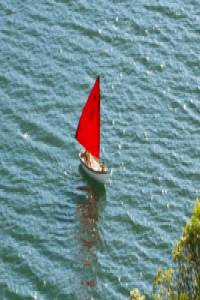

In [20]:

# Save vertically flipped image
cv2.imwrite("vertical_flip.png", img_nz_flip_vertical[:, :, ::-1])
Image(filename='vertical_flip.png')

# Save the cropped region
cv2.imwrite("cropped_region.png", cropped_region[:, :, ::-1])
Image(filename='cropped_region.png')

# Save the resized image with aspect ratio preserved
cv2.imwrite("resized_aspect_ratio.png", resize_img_aspect_ratio[:, :, ::-1])
Image(filename='resized_aspect_ratio.png')

# Save the resized image (converted from RGB to BGR)
cv2.imwrite("resized_image.png", resize_img_w_h[:, :, ::-1])
Image(filename='resized_image.png')

